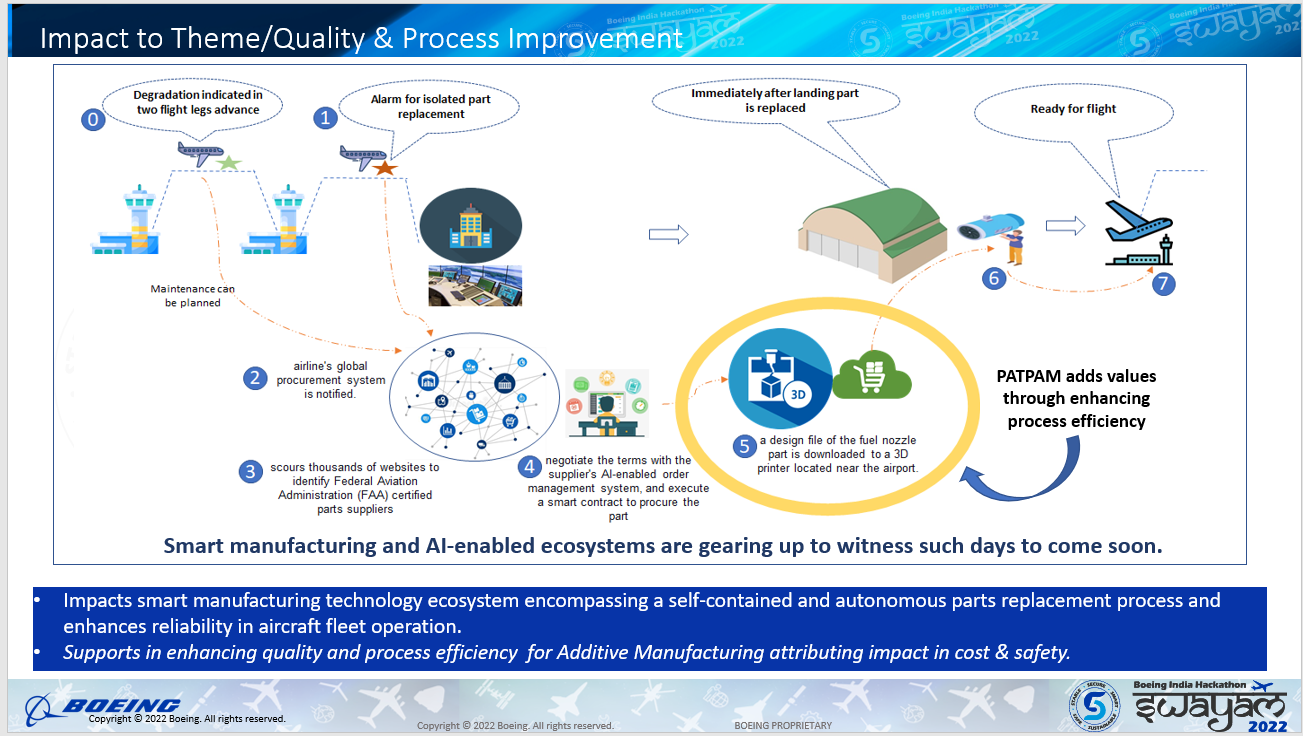
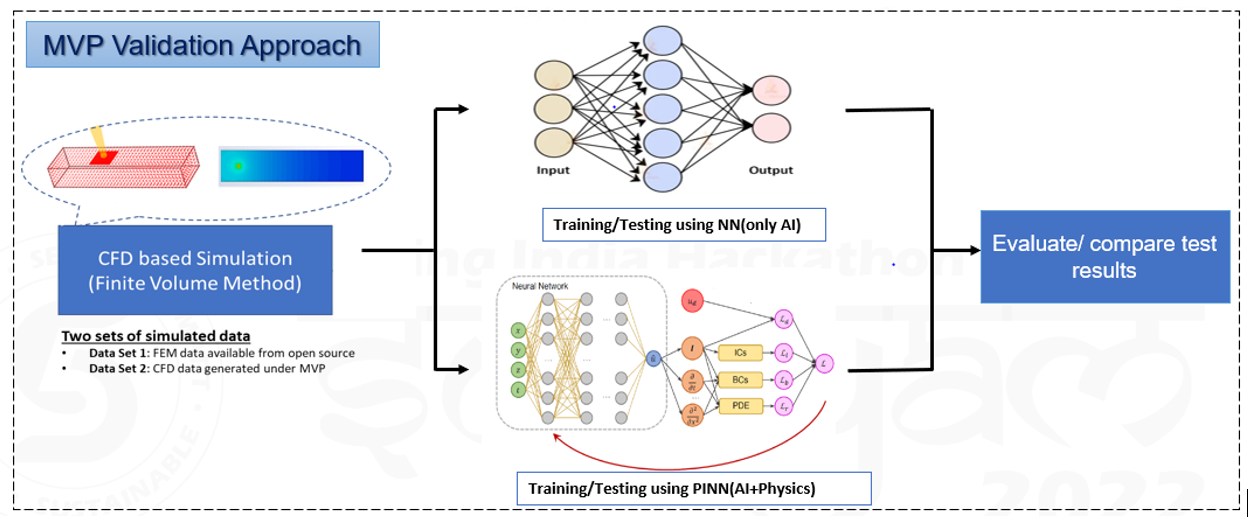

# Library Import

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')

# Boundary and domain points constructions
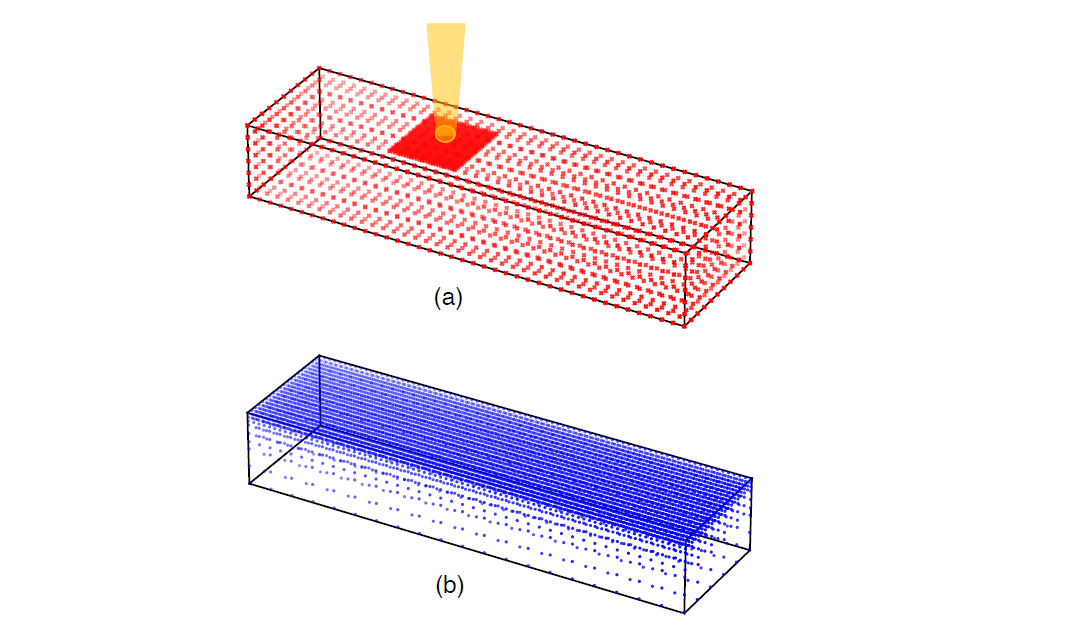

In [1]:
import numpy as np

def sampling_uniform(res,x_min,x_max,loc,t,e=0.05):
    if isinstance(res,float):
        res = [res,res,res]
    if loc == '-x':
        yp = np.linspace(x_min[1],x_max[1],round((x_max[1]-x_min[1])/res[1]) + 1)
        zp = np.linspace(x_min[2],x_max[2],round((x_max[2]-x_min[2])/res[2]) + 1)
        grid = np.meshgrid(yp,zp)
        yp = grid[0].flatten()
        zp = grid[1].flatten()
        xp = np.ones_like(yp)*x_min[0]
        x = np.vstack((xp,yp,zp)).T
    if loc == '+x':
        yp = np.linspace(x_min[1],x_max[1],round((x_max[1]-x_min[1])/res[1]) + 1) 
        zp = np.linspace(x_min[2],x_max[2],round((x_max[2]-x_min[2])/res[2]) + 1)
        grid = np.meshgrid(yp,zp)
        yp = grid[0].flatten()
        zp = grid[1].flatten()
        xp = np.ones_like(yp)*x_max[0]
        x = np.vstack((xp,yp,zp)).T
    if loc == '-y':
        xp = np.linspace(x_min[0],x_max[0],round((x_max[0]-x_min[0])/res[0]) + 1)
        zp = np.linspace(x_min[2],x_max[2],round((x_max[2]-x_min[2])/res[2]) + 1)
        grid = np.meshgrid(xp,zp)
        xp = grid[0].flatten()
        zp = grid[1].flatten()
        yp = np.ones_like(xp)*x_min[1]
        x = np.vstack((xp,yp,zp)).T
    if loc == '+y':
        xp = np.linspace(x_min[0],x_max[0],round((x_max[0]-x_min[0])/res[1]) + 1)
        zp = np.linspace(x_min[2],x_max[2],round((x_max[2]-x_min[2])/res[2]) + 1)
        grid = np.meshgrid(xp,zp)
        xp = grid[0].flatten()
        zp = grid[1].flatten()
        yp = np.ones_like(xp)*x_max[1]
        x = np.vstack((xp,yp,zp)).T
    if loc == '-z':
        xp = np.linspace(x_min[0],x_max[0],round((x_max[0]-x_min[0])/res[0]) + 1)
        yp = np.linspace(x_min[1],x_max[1],round((x_max[1]-x_min[1])/res[1]) + 1)
        grid = np.meshgrid(xp,yp)
        xp = grid[0].flatten()
        yp = grid[1].flatten()
        zp = np.ones_like(xp)*x_min[2]
        x = np.vstack((xp,yp,zp)).T
    if loc == '+z':
        xp = np.linspace(x_min[0],x_max[0],round((x_max[0]-x_min[0])/res[0]) + 1) 
        yp = np.linspace(x_min[1],x_max[1],round((x_max[1]-x_min[1])/res[1]) + 1) 
        grid = np.meshgrid(xp,yp)
        xp = grid[0].flatten()
        yp = grid[1].flatten()
        zp = np.ones_like(xp)*x_max[2]
        x = np.vstack((xp,yp,zp)).T
    if loc == 'domain':
        xp = np.linspace(x_min[0]+e,x_max[0]-e,round((x_max[0]-x_min[0])/res[0]) + 1) 
        yp = np.linspace(x_min[1]+e,x_max[1]-e,round((x_max[1]-x_min[1])/res[1]) + 1)
        zp = np.linspace(x_min[2]+e,x_max[2]-e,round((x_max[2]-x_min[2])/res[2]) + 1)
        grid = np.meshgrid(xp,yp,zp)
        xp = grid[0].flatten()
        yp = grid[1].flatten()
        zp = grid[2].flatten()
        x = np.vstack((xp,yp,zp)).T
        
    xt = []
    num = x.shape[0]
    for ti in t:
        xt.append(np.hstack((x, np.full([num,1], ti))))
    xt = np.vstack(xt) 
    return xt, xt.shape[0]



def sampling_uniform_2D(res,x_min,x_max,loc,t,e=0.05):
    if isinstance(res,float):
        res = [res,res,res]
    if loc == '-x':
        yp = np.linspace(x_min[1],x_max[1],round((x_max[1]-x_min[1])/res[1]) + 1)
        xp = np.ones_like(yp)*x_min[0]
        x = np.vstack((xp,yp)).T
    if loc == '+x':
        yp = np.linspace(x_min[1],x_max[1],round((x_max[1]-x_min[1])/res[1]) + 1) 
        xp = np.ones_like(yp)*x_max[0]
        x = np.vstack((xp,yp)).T
    if loc == '-y':
        xp = np.linspace(x_min[0],x_max[0],round((x_max[0]-x_min[0])/res[0]) + 1)
        yp = np.ones_like(xp)*x_min[1]
        x = np.vstack((xp,yp)).T
    if loc == '+y':
        xp = np.linspace(x_min[0],x_max[0],round((x_max[0]-x_min[0])/res[1]) + 1)
        yp = np.ones_like(xp)*x_max[1]
        x = np.vstack((xp,yp)).T
    if loc == 'domain':
        xp = np.linspace(x_min[0]+e,x_max[0]-e,round((x_max[0]-x_min[0])/res[0]) + 1) 
        yp = np.linspace(x_min[1]+e,x_max[1]-e,round((x_max[1]-x_min[1])/res[1]) + 1)
        grid = np.meshgrid(xp,yp)
        xp = grid[0].flatten()
        yp = grid[1].flatten()
        x = np.vstack((xp,yp)).T
    xt = []
    num = x.shape[0]
    for ti in t:
        xt.append(np.hstack((x, np.full([num,1], ti))))
    xt = np.vstack(xt) 
    return xt, xt.shape[0]

# Training the Model Using Loss Function

In [2]:
import torch
import torch.nn as nn
import time

def loss(f,target=None):
    if target == None:
        #print('Condition 1', torch.sum(torch.square(f))/f.shape[0])
        return torch.sum(torch.square(f))/f.shape[0]
    if isinstance(target,float):
        #print('Condition 2', torch.sum(torch.square(f-target))/f.shape[0])
        return torch.sum(torch.square(f-target))/f.shape[0]
    else:
        #print('Condition 3', nn.MSELoss()(f,target))
        return nn.MSELoss()(f,target)
    
def train(net,PDE,BC,point_sets,flags,iterations=10,lr=5e-4,info_num=100,
         test_in = None, test_out=None,w=[1.,1.,1.,1.],inv_params=[]):
    
    if inv_params == []:
        params = net.parameters()
    else:
        params = (list(net.parameters())+inv_params)
    optimizer = torch.optim.Adam(params,lr=lr)
    
    n_bc = 0
    n_ic = 0
    n_PDE = 0
    n_data =0
    for points,flag in zip(point_sets,flags):
        if flag[0] == 'BC':
            n_bc += points.shape[0]
        if flag[0] == 'IC':
            n_ic += points.shape[0]
        if flag[0] == 'domain':
            n_PDE += points.shape[0]
        if flag[0] == 'data':
            n_data += points.shape[0]
            
    start_time = time.time()
    
    l_history = []
    if test_in != None:
        err_history = []
    for epoch in range(iterations):
        optimizer.zero_grad()
        l_BC = 0
        l_IC = 0
        l_PDE = 0
        l_data = 0
    
        for points,flag in zip(point_sets,flags):
            if flag[0] == 'BC':
                f = BC(points[:,0:1],points[:,1:2],points[:,2:3],points[:,3:4],net,flag[1])
                l_BC += loss(f)*points.shape[0]/n_bc
            if flag[0] == 'IC':
                pred = net(points)
                l_IC += loss(pred,flag[1])*points.shape[0]/n_ic
            if flag[0] == 'data':
                pred = net(points)
                l_data += loss(pred,flag[1])*points.shape[0]/n_data
            if flag[0] == 'domain':
                f = PDE(points[:,0:1],points[:,1:2],points[:,2:3],points[:,3:4],net)
                l_PDE += loss(f)*points.shape[0]/n_PDE
            
        
        if n_data == 0:
            cost = (w[0]*l_BC+w[1]*l_IC+w[2]*l_PDE)/3 #weighted
            l_history.append([cost.item(),
                      l_BC.item(),
                      l_IC.item(),
                      l_PDE.item()])
            
            if epoch%info_num == 0:
                if test_in != None:
                    T_pred = net(test_in)
                    Test_err = loss(T_pred,test_out)
                    err_history.append(Test_err.item())
                    elapsed = time.time() - start_time
                    print('It: %d, Loss: %.3e, BC: %.3e, IC: %.3e, PDE: %.3e, Test: %.3e, Time: %.2f' 
                          % (epoch, cost, l_BC, l_IC, l_PDE, Test_err, elapsed))
                    start_time = time.time()
                else:
                    elapsed = time.time() - start_time
                    print('It: %d, Loss: %.3e, BC: %.3e, IC: %.3e, PDE: %.3e, Time: %.2f' 
                          % (epoch, cost, l_BC, l_IC, l_PDE,elapsed))
                    start_time = time.time()
                                        
        else:
            cost = (w[0]*l_BC+w[1]*l_IC+w[2]*l_PDE+w[3]*l_data)/4 #weighted
            l_history.append([cost.item(),
                              l_BC.item(),
                              l_IC.item(),
                              l_PDE.item(),
                              l_data.item()])
            
            if epoch%info_num == 0:
                if test_in != None:
                    T_pred = net(test_in)
                    Test_err = loss(T_pred,test_out)
                    err_history.append(Test_err.item())
                    elapsed = time.time() - start_time
                    print('It: %d, Loss: %.3e, BC: %.3e, IC: %.3e, PDE: %.3e, Data: %.3e, Test: %.3e, Time: %.2f' 
                          % (epoch, cost, l_BC, l_IC, l_PDE, l_data,Test_err, elapsed))
                    start_time = time.time()
                else:
                    elapsed = time.time() - start_time
                    print('It: %d, Loss: %.3e, BC: %.3e, IC: %.3e, PDE: %.3e, Data: %.3e, Time: %.2f' 
                          % (epoch, cost, l_BC, l_IC, l_PDE, l_data, elapsed))
                    start_time = time.time()
                
                if inv_params!=[]:
                    for value in inv_params:
                        print(value.item())
                    
            
        cost.backward() 
        optimizer.step()
    
    return l_history,err_history


def train2D(net,PDE,BC,point_sets,flags,iterations=1000,lr=5e-4,info_num=100,
         test_in = None, test_out=None,w=[1.,1.,1.,1.],inv_params=None):
    
    if inv_params == None:
        params = net.parameters()
    else:
        params = (list(net.parameters())+inv_params)
    optimizer = torch.optim.Adam(params,lr=lr)
    
    n_bc = 0
    n_ic = 0
    n_PDE = 0
    n_data =0
    for points,flag in zip(point_sets,flags):
        if flag[0] == 'BC':
            n_bc += points.shape[0]
        if flag[0] == 'IC':
            n_ic += points.shape[0]
        if flag[0] == 'domain':
            n_PDE += points.shape[0]
        if flag[0] == 'data':
            n_data += points.shape[0]
            
    start_time = time.time()
    
    l_history = []
    if test_in != None:
        err_history = []
    for epoch in range(iterations):
        optimizer.zero_grad()
        l_BC = 0
        l_IC = 0
        l_PDE = 0
        l_data = 0
    
        for points,flag in zip(point_sets,flags):
            if flag[0] == 'BC':
                f = BC(points[:,0:1],points[:,1:2],points[:,2:3],net,flag[1])
                l_BC += loss(f)*points.shape[0]/n_bc
            if flag[0] == 'IC':
                pred = net(points)
                l_IC += loss(pred,flag[1])*points.shape[0]/n_ic
            if flag[0] == 'data':
                pred = net(points)
                l_data += loss(pred,flag[1])*points.shape[0]/n_data
            if flag[0] == 'domain':
                f = PDE(points[:,0:1],points[:,1:2],points[:,2:3],net)
                l_PDE += loss(f)*points.shape[0]/n_PDE
            
        
        if n_data == 0:
            cost = (w[0]*l_BC+w[1]*l_IC+w[2]*l_PDE)/3 #weighted
            l_history.append([cost.item(),
                      l_BC.item(),
                      l_IC.item(),
                      l_PDE.item()])
            
            if epoch%info_num == 0:
                if test_in != None:
                    T_pred = net(test_in)
                    Test_err = loss(T_pred,test_out)
                    err_history.append(Test_err.item())
                    elapsed = time.time() - start_time
                    print('It: %d, Loss: %.3e, BC: %.3e, IC: %.3e, PDE: %.3e, Test: %.3e, Time: %.2f' 
                          % (epoch, cost, l_BC, l_IC, l_PDE, Test_err, elapsed))
                    start_time = time.time()
                else:
                    elapsed = time.time() - start_time
                    print('It: %d, Loss: %.3e, BC: %.3e, IC: %.3e, PDE: %.3e, Time: %.2f' 
                          % (epoch, cost, l_BC, l_IC, l_PDE,elapsed))
                    start_time = time.time()
                                        
        else:
            cost = (w[0]*l_BC+w[1]*l_IC+w[2]*l_PDE+w[3]*l_data)/4 #weighted
            l_history.append([cost.item(),
                              l_BC.item(),
                              l_IC.item(),
                              l_PDE.item(),
                              l_data.item()])
            
            if epoch%info_num == 0:
                if test_in != None:
                    T_pred = net(test_in)
                    Test_err = loss(T_pred,test_out)
                    err_history.append(Test_err.item())
                    elapsed = time.time() - start_time
                    print('It: %d, Loss: %.3e, BC: %.3e, IC: %.3e, PDE: %.3e, Data: %.3e, Test: %.3e, Time: %.2f' 
                          % (epoch, cost, l_BC, l_IC, l_PDE, l_data,Test_err, elapsed))
                    start_time = time.time()
                else:
                    elapsed = time.time() - start_time
                    print('It: %d, Loss: %.3e, BC: %.3e, IC: %.3e, PDE: %.3e, Data: %.3e, Time: %.2f' 
                          % (epoch, cost, l_BC, l_IC, l_PDE, l_data, elapsed))
                    start_time = time.time()
                
                if inv_params!=[]:
                    for value in inv_params:
                        print(value.item())
                    
            
        cost.backward() 
        optimizer.step()
        

    return l_history,err_history



def train2DnoBC(net,PDE,BC,point_sets,flags,iterations=1000,lr=5e-4,info_num=100,
         test_in = None, test_out=None,w=[1.,1.,1.,1.],inv_params=None):
    
    if inv_params == None:
        params = net.parameters()
    else:
        params = (list(net.parameters())+inv_params)
    optimizer = torch.optim.Adam(params,lr=lr)
    
    n_ic = 0
    n_PDE = 0
    n_data =0
    for points,flag in zip(point_sets,flags):
        if flag[0] == 'BC':
            n_bc += points.shape[0]
        if flag[0] == 'IC':
            n_ic += points.shape[0]
        if flag[0] == 'domain':
            n_PDE += points.shape[0]
        if flag[0] == 'data':
            n_data += points.shape[0]
            
    start_time = time.time()
    
    l_history = []
    if test_in != None:
        err_history = []
    for epoch in range(iterations):
        optimizer.zero_grad()
        l_BC = 0
        l_IC = 0
        l_PDE = 0
        l_data = 0
    
        for points,flag in zip(point_sets,flags):
            if flag[0] == 'BC':
                f = BC(points[:,0:1],points[:,1:2],points[:,2:3],net,flag[1])
                l_BC += loss(f)*points.shape[0]/n_bc
            if flag[0] == 'IC':
                pred = net(points)
                l_IC += loss(pred,flag[1])*points.shape[0]/n_ic
            if flag[0] == 'data':
                pred = net(points)
                l_data += loss(pred,flag[1])*points.shape[0]/n_data
            if flag[0] == 'domain':
                f = PDE(points[:,0:1],points[:,1:2],points[:,2:3],net)
                l_PDE += loss(f)*points.shape[0]/n_PDE
            
        
        if n_data == 0:
            cost = (w[0]*l_BC+w[1]*l_IC+w[2]*l_PDE)/3 #weighted
            l_history.append([cost.item(),
                      l_BC.item(),
                      l_IC.item(),
                      l_PDE.item()])
            
            if epoch%info_num == 0:
                if test_in != None:
                    T_pred = net(test_in)
                    Test_err = loss(T_pred,test_out)
                    err_history.append(Test_err.item())
                    elapsed = time.time() - start_time
                    print('It: %d, Loss: %.3e, BC: %.3e, IC: %.3e, PDE: %.3e, Test: %.3e, Time: %.2f' 
                          % (epoch, cost, l_BC, l_IC, l_PDE, Test_err, elapsed))
                    start_time = time.time()
                else:
                    elapsed = time.time() - start_time
                    print('It: %d, Loss: %.3e, BC: %.3e, IC: %.3e, PDE: %.3e, Time: %.2f' 
                          % (epoch, cost, l_BC, l_IC, l_PDE,elapsed))
                    start_time = time.time()
                                        
        else:
            cost = (w[0]*l_BC+w[1]*l_IC+w[2]*l_PDE+w[3]*l_data)/4 #weighted
            l_history.append([cost.item(),
                              l_BC.item(),
                              l_IC.item(),
                              l_PDE.item(),
                              l_data.item()])
            
            if epoch%info_num == 0:
                if test_in != None:
                    T_pred = net(test_in)
                    Test_err = loss(T_pred,test_out)
                    err_history.append(Test_err.item())
                    elapsed = time.time() - start_time
                    print('It: %d, Loss: %.3e, BC: %.3e, IC: %.3e, PDE: %.3e, Data: %.3e, Test: %.3e, Time: %.2f' 
                          % (epoch, cost, l_BC, l_IC, l_PDE, l_data,Test_err, elapsed))
                    start_time = time.time()
                else:
                    elapsed = time.time() - start_time
                    print('It: %d, Loss: %.3e, BC: %.3e, IC: %.3e, PDE: %.3e, Data: %.3e, Time: %.2f' 
                          % (epoch, cost, l_BC, l_IC, l_PDE, l_data, elapsed))
                    start_time = time.time()
                
                if inv_params!=[]:
                    for value in inv_params:
                        print(value.item())
                    
            
        cost.backward() 
        optimizer.step()
        

    return l_history,err_history

C:\Users\kq250f\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Feed Forward Neural Network Creation



In [3]:
import torch
import torch.nn as nn

class FNN(nn.Module):
    def __init__(self,layers,activation,in_tf=None,out_tf=None):
        super().__init__()
        self.activation = activation
        self.linears = nn.ModuleList()
        self.in_tf = in_tf
        self.out_tf = out_tf
        # weight initialization
        for i in range(1,len(layers)):
            self.linears.append(nn.Linear(layers[i-1],layers[i]))
            nn.init.xavier_uniform_(self.linears[-1].weight)
            nn.init.zeros_(self.linears[-1].bias)
                      
    def forward(self,inputs):
        X = inputs
        # input transformation
        if self.in_tf:
            X = self.in_tf(X)
        # linear layers    
        for linear in self.linears[:-1]:
            X = self.activation(linear(X))
        # last layer, no activation
        X = self.linears[-1](X)
        # output transformation
        if self.out_tf:
            X = self.out_tf(X)
        return X

In [8]:
# import numpy as np
# t = np.linspace(0.01,3,61)
# t

In [5]:
# yp = np.linspace(0, 10, 11)
# zp = np.linspace(0, 6, 7)
# print(yp)
# print(zp)
# grid = np.meshgrid(yp,zp)
# yp = grid[0].flatten()
# zp = grid[1].flatten()
# print(yp)
# print(zp)
# xp = np.ones_like(yp)*0
# print(xp)
# x = np.vstack((xp,yp,zp)).T
# print(x)

In [6]:
# x.shape

In [7]:
#     xt = []
#     num = x.shape[0]
#     for ti in t:
#         xt.append(np.hstack((x, np.full([num,1], ti))))
#     xt = np.vstack(xt) 

In [8]:
#!pip install pyvista

# Physics_Governing_Functions

In [9]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable,grad
import time
import pyvista as pv
import argparse
torch.manual_seed(0)


def output_transform(X):
    X = T_range*nn.Softplus()(X)+ T_ref
    return X


def input_transform(X):
    X = 2.*(X-X_min)/(X_max-X_min) - 1.
    return X


def PDE(x,y,z,t,net):
    X = torch.concat([x,y,z,t],axis=-1)
    T = net(X)
    
    T_t = grad(T,t,create_graph=True,grad_outputs=torch.ones_like(T))[0]

    T_x = grad(T,x,create_graph=True,grad_outputs=torch.ones_like(T))[0]
    T_xx = grad(T_x,x,create_graph=True,grad_outputs=torch.ones_like(T_x))[0]
    
    T_y = grad(T,y,create_graph=True,grad_outputs=torch.ones_like(T))[0]
    T_yy = grad(T_y,y,create_graph=True,grad_outputs=torch.ones_like(T_y))[0]
    
    T_z = grad(T,z,create_graph=True,grad_outputs=torch.ones_like(T))[0]
    T_zz = grad(T_z,z,create_graph=True,grad_outputs=torch.ones_like(T_z))[0]
    
    f = rho*Cp*T_t - k*(T_xx+T_yy+T_zz)

    return f


def generate_points(p=[],f=[]):

    t = np.linspace(x_min[3]+0.01,x_max[3],61)

    # boundary points
    bound_x_neg,_ = sampling_uniform(1.,x_min,x_max,'-x',t)
    bound_x_pos,_ = sampling_uniform(1.,x_min,x_max,'+x',t)

    bound_y_neg,_ = sampling_uniform(1.,x_min,x_max,'-y',t)
    bound_y_pos,_ = sampling_uniform(1.,x_min,x_max,'+y',t)

    bound_z_neg,_ = sampling_uniform(1.,x_min,x_max,'-z',t)
    bound_z_pos,_ = sampling_uniform(1.,x_min,x_max,'+z',t)

    bound_z_pos_more = [] # more points for surface flux
    
    for ti in t:
        if ti<=t_end:
            zi,_ = sampling_uniform(.25,
                        [max(x0+ti*v-2*r,x_min[0]),max(x_min[1],y0-2*r),x_min[2]],
                        [min(x0+ti*v+2*r,x_max[0]),min(x_max[1],y0+2*r),x_max[2]],
                        '+z',[ti])
            bound_z_pos_more.append(zi)

    bound_z_pos_more = np.vstack(bound_z_pos_more)
    bound_z_pos = np.vstack((bound_z_pos,bound_z_pos_more))

    ### domain points
    domain_pts1,_ = sampling_uniform(2.,
                                     [x_min[0],x_min[1],x_min[2]],
                                     [x_max[0],x_max[1],x_max[2]-3.],'domain',t)

    domain_pts2,_ = sampling_uniform(1.,
                                     [x_min[0],x_min[1],x_max[2]-3.+.5],
                                     [x_max[0],x_max[1],x_max[2]-1.],'domain',t)

    domain_pts3 = []
    for ti in t:
        di,_ = sampling_uniform(.5,
                                [x_min[0],x_min[1],x_max[2]-1.+.25,],
                                [x_max[0],x_max[1],x_max[2]],'domain',[ti])
        domain_pts3.append(di)
    domain_pts3 = np.vstack(domain_pts3)
    domain_pts = np.vstack((domain_pts1,domain_pts2,domain_pts3))

    # initial points
    init_pts1,_ = sampling_uniform(2.,[x_min[0],x_min[1],x_min[2]],
                                   [x_max[0],x_max[1],x_max[2]],'domain',[0],e=0)
    # more points near the toolpath origin
    init_pts2,_ = sampling_uniform(.5,[x0-2,y0-2,x_max[2]-2],
                                   [x0+2,y0+2,x_max[2]],'domain',[0])
    
    init_pts = np.vstack((init_pts1,init_pts2))
    

    p.extend([torch.tensor(bound_x_neg,requires_grad=True,dtype=torch.float).to(device),
              torch.tensor(bound_x_pos,requires_grad=True,dtype=torch.float).to(device),
              torch.tensor(bound_y_neg,requires_grad=True,dtype=torch.float).to(device),
              torch.tensor(bound_y_pos,requires_grad=True,dtype=torch.float).to(device),
              torch.tensor(bound_z_neg,requires_grad=True,dtype=torch.float).to(device),
              torch.tensor(bound_z_pos,requires_grad=True,dtype=torch.float).to(device),
              torch.tensor(init_pts,requires_grad=True,dtype=torch.float).to(device),
              torch.tensor(domain_pts,requires_grad=True,dtype=torch.float).to(device)])
    f.extend([['BC','-x'],['BC','+x'],['BC','-y'],['BC','+y'],['BC','-z'],['BC','+z'],['IC',T_ref],['domain']])
    
    return p,f


def load_data(p,f,filename,num):
    data = np.load(filename)
    if num!= 0:
        np.random.shuffle(data)
        data = data[0:num,:]
    p.extend([torch.tensor(data[:,0:4],requires_grad=True,dtype=torch.float).to(device)])
    f.extend([['data',torch.tensor(data[:,4:5],requires_grad=True,dtype=torch.float).to(device)]])
    return p,f


def BC(x,y,z,t,net,loc):
    X = torch.concat([x,y,z,t],axis=-1)
    T = net(X)
    if loc == '-x':
        T_x = grad(T,x,create_graph=True,grad_outputs=torch.ones_like(T))[0]
        return k*T_x - h*(T-T_ref) - Rboltz*emiss*(T**4-T_ref**4)
    if loc == '+x':
        T_x = grad(T,x,create_graph=True,grad_outputs=torch.ones_like(T))[0]
        return -k*T_x - h*(T-T_ref) - Rboltz*emiss*(T**4-T_ref**4)
    if loc == '-y':
        T_y = grad(T,y,create_graph=True,grad_outputs=torch.ones_like(T))[0]
        return k*T_y - h*(T-T_ref) - Rboltz*emiss*(T**4-T_ref**4)
    if loc == '+y':
        T_y = grad(T,y,create_graph=True,grad_outputs=torch.ones_like(T))[0]
        return -k*T_y - h*(T-T_ref) - Rboltz*emiss*(T**4-T_ref**4)
    if loc == '-z':
        T_t = grad(T,t,create_graph=True,grad_outputs=torch.ones_like(T))[0]
        return T_t
    if loc == '+z':
        T_z = grad(T,z,create_graph=True,grad_outputs=torch.ones_like(T))[0]
        q = 2*P*eta/torch.pi/r**2*torch.exp(-2*(torch.square(x-x0-v*t)+torch.square(y-y0))/r**2)*(t<=t_end)*(t>0)
        return -k*T_z - h*(T-T_ref) - Rboltz*emiss*(T**4-T_ref**4) + q
    
    


# Metal Properties And Affecting Parameters

In [10]:
   
    # augments
    parser = argparse.ArgumentParser()
    parser.add_argument('--device', type=str, default='0', help='GPU name')
    parser.add_argument('--output', type=str, default='bareplate', help='output filename')
    parser.add_argument('--T_ref', type=float, default=298., help='ambient temperature')
    parser.add_argument('--T_range', type=float, default=3000., help='temperature range')
    # bareplate size
    parser.add_argument('--xmax', type=float, default=40., help='max x') # 40 mm * 10 mm * 6 mm
    parser.add_argument('--xmin', type=float, default=0., help='min x')
    parser.add_argument('--ymax', type=float, default=10., help='max y')
    parser.add_argument('--ymin', type=float, default=0., help='min y')
    parser.add_argument('--zmax', type=float, default=6., help='max z')
    parser.add_argument('--zmin', type=float, default=0., help='min z')
    parser.add_argument('--tmax', type=float, default=3., help='max t') # run for 3 seconds
    parser.add_argument('--tmin', type=float, default=0., help='min t')
    parser.add_argument('--Cp', type=float, default=.5, help='specific heat')
    parser.add_argument('--k', type=float, default=.01, help='heat conductivity')
    parser.add_argument('--x0', type=float, default=5., help='toolpath origin x')
    parser.add_argument('--y0', type=float, default=5., help='toolpath origin y')
    parser.add_argument('--r', type=float, default=1.5, help='beam radius') # beam radius 
    parser.add_argument('--v', type=float, default=10., help='scan speed') #scan speed
    parser.add_argument('--t_end', type=float, default=3.,help='laser stop time')
    parser.add_argument('--h', type=float, default=2e-5, help='convection coefficient')
    parser.add_argument('--eta', type=float, default=.4, help='absorptivity')
    parser.add_argument('--P', type=float, default=500., help='laser power') # laser power
    parser.add_argument('--emiss', type=float, default=.3, help='emissivity')
    parser.add_argument('--rho', type=float, default=8e-3, help='rho')
    parser.add_argument('--iters', type=int, default=5000, help='number of iters')
    parser.add_argument('--lr', type=float, default=2e-4, help='learning rate')
    parser.add_argument('--data', type=str, default='None', help='filename, default:None')
    parser.add_argument('--data_num', type=int, default= 0, help='number of training data used, 0 for all data')
    parser.add_argument('--calib_eta',type=bool, default = False, help='calibrate eta')
    parser.add_argument('--calib_material',type=bool, default = False, help='calibrate cp and k')
    parser.add_argument('--valid',type=str, default = 'data.npy', help='validation data file')
    parser.add_argument('--pretrain',type=str, default = 'None', help='pretrained model file')
    parser.add_argument("-f", "--file", required=False)
  
    args = parser.parse_args()
    
    ##############params 
    device = torch.device("cuda:{}".format(args.device) if torch.cuda.is_available() else "cpu")
    # domain
    x_max = np.array([args.xmax, args.ymax, args.zmax, args.tmax])
    x_min = np.array([args.xmin, args.ymin, args.zmin, args.tmin])
    X_max = torch.tensor(x_max,dtype=torch.float).to(device)
    X_min = torch.tensor(x_min,dtype=torch.float).to(device)
    
    # laser params
    x0 = args.x0
    y0 = args.y0
    r = args.r
    v = args.v # speed
    t_end = args.t_end
    P = args.P # power
    eta = args.eta

    # T_ambient, and max T range
    T_ref = args.T_ref
    T_range = args.T_range

    # material params
    Cp = args.Cp
    k = args.k
    h = args.h
    Rboltz = 5.6704e-14
    emiss = args.emiss
    rho = args.rho
    
    # valid data
    data = np.load(args.valid)
    test_in = torch.tensor(data[:,0:4],requires_grad=False,dtype=torch.float).to(device)
    test_out = torch.tensor(data[:,4:5],requires_grad=False,dtype=torch.float).to(device)
    
    
    iterations = args.iters
    lr = args.lr

    net = FNN([4,64,64,64,1],nn.Tanh(),in_tf=input_transform,out_tf=output_transform)
    net.to(device)
    if args.pretrain != 'None':
        net.load_state_dict(torch.load(args.pretrain))

    point_sets,flags = generate_points([],[])
    if args.data != 'None':
        point_sets,flags = load_data(point_sets,flags,args.data,args.data_num)

    inv_params = []    
    if args.calib_eta:
        eta = torch.tensor(1e-5,requires_grad=True,device=device)
        inv_params.append(eta)
    
    if args.calib_material:
        Cp = torch.tensor(1e-5,requires_grad=True,device=device)
        inv_params.append(Cp)
        k = torch.tensor(1e-5,requires_grad=True,device=device)
        inv_params.append(k)

# Division of Test and Train Data

In [11]:
from sklearn.model_selection import train_test_split
# without PINN
test_in = torch.tensor(data[:,0:4],requires_grad=False,dtype=torch.float).to(device)
test_out = torch.tensor(data[:,4:5],requires_grad=False,dtype=torch.float).to(device)
#Splitting the data into Train and Test (80 per Train data and 20 per Test Data)
X_train, X_test, y_train, y_test = train_test_split(test_in, test_out, test_size=0.20)

In [12]:
l_history,err_history = train(net,PDE,BC,point_sets,flags,iterations=100,lr=lr,info_num=10,
                                        test_in = X_train,test_out = y_train,w=[1.,1e-4,1.,1e-4],
                                 inv_params = inv_params)
    
# torch.save(net.state_dict(),'bareplate/{}.pt'.format( args.output))
# np.save('bareplate/{}.npy'.format(args.output),l_history)
# np.save('bareplate/{}_err.npy'.format(args.output),err_history)

It: 0, Loss: 7.908e+03, BC: 2.314e+04, IC: 5.829e+06, PDE: 1.652e+00, Test: 6.568e+10, Time: 3.64
It: 10, Loss: 3.767e+02, BC: 7.566e+02, IC: 3.734e+06, PDE: 8.365e-02, Test: 6.568e+10, Time: 119.01
It: 20, Loss: 7.717e+02, BC: 1.992e+03, IC: 3.229e+06, PDE: 2.875e-02, Test: 6.567e+10, Time: 117.18
It: 30, Loss: 2.495e+02, BC: 3.974e+02, IC: 3.510e+06, PDE: 4.139e-02, Test: 6.566e+10, Time: 117.53
It: 40, Loss: 2.774e+02, BC: 4.760e+02, IC: 3.563e+06, PDE: 6.178e-02, Test: 6.565e+10, Time: 119.46
It: 50, Loss: 1.959e+02, BC: 2.542e+02, IC: 3.335e+06, PDE: 2.227e-02, Test: 6.565e+10, Time: 117.88
It: 60, Loss: 1.864e+02, BC: 2.361e+02, IC: 3.230e+06, PDE: 1.495e-02, Test: 6.564e+10, Time: 119.42
It: 70, Loss: 1.664e+02, BC: 1.760e+02, IC: 3.232e+06, PDE: 1.789e-02, Test: 6.564e+10, Time: 120.13
It: 80, Loss: 1.563e+02, BC: 1.508e+02, IC: 3.179e+06, PDE: 1.620e-02, Test: 6.564e+10, Time: 121.49
It: 90, Loss: 1.471e+02, BC: 1.313e+02, IC: 3.100e+06, PDE: 1.265e-02, Test: 6.563e+10, Time: 

In [13]:
net_saved = FNN([4,64,64,64,1],nn.Tanh(),in_tf=input_transform,out_tf=output_transform) 
MODEL_PATH = 'bareplate.pt'
net_saved.load_state_dict(torch.load(MODEL_PATH, 
map_location=torch.device('cpu')))


<All keys matched successfully>

In [14]:
import torch
import torch.nn as nn
import time

def lossWithoutPINN(f,target=None):
    if target == None:
        return torch.sum(torch.square(f))/f.shape[0]
    if isinstance(target,float):
        return torch.sum(torch.square(f-target))/f.shape[0]
    else:
        return nn.MSELoss()(f,target)
    
def trainWithoutPINN(net, iterations=500,lr=5e-4,info_num=100,
         test_in = None, test_out=None,w=[1.,1.,1.,1.],inv_params=[]):
    
    if inv_params == []:
        params = net.parameters()
    else:
        params = (list(net.parameters())+inv_params)
    optimizer = torch.optim.Adam(params,lr=lr)
            
    start_time = time.time()
    
    l_history = []
    if test_in != None:
        err_history = []
    for epoch in range(iterations):
      optimizer.zero_grad()
      if test_in != None:
        T_pred = net(test_in)
        loss = lossWithoutPINN(T_pred,test_out)
        err_history.append(loss.item())
        elapsed = time.time() - start_time
        print('It: %d, Loss: %.3e, Time: %.2f' 
                          % (epoch, loss, elapsed))
        start_time = time.time()
      else:
        elapsed = time.time() - start_time
        print('It: %d, Loss: %.3e, Time: %.2f' 
                          % (epoch, loss, elapsed))
        start_time = time.time()
                
        if inv_params!=[]:
          for value in inv_params:
            print(value.item())
    
        loss.backward(retain_graph=true) 
        optimizer.step()
    
    return l_history,err_history



1.   Training and Predicting Using a FFN Without PINN Data
2.   Visualization of Test Data VS Predicted Data
3.   80 Per Data is used for Training and 20 per for Test



In [15]:
    netwithoutPINN = FNN([4,64,64,64,1],nn.Tanh(),in_tf=input_transform,out_tf=output_transform)
    netwithoutPINN.to(device)  
    l_history,err_history = trainWithoutPINN(netwithoutPINN,iterations=100,lr=lr,info_num=10,
                                             test_in = X_train,test_out = y_train,w=[1.,1e-4,1.,1e-4],
                                 inv_params = inv_params)
    
    # torch.save(net.state_dict(),'bareplate/{}.pt'.format( args.output))
    # np.save('bareplate/{}.npy'.format(args.output),l_history)
    # np.save('bareplate/{}_err.npy'.format(args.output),err_history)

It: 0, Loss: 6.563e+10, Time: 0.02
It: 1, Loss: 6.563e+10, Time: 0.02
It: 2, Loss: 6.563e+10, Time: 0.02
It: 3, Loss: 6.563e+10, Time: 0.02
It: 4, Loss: 6.563e+10, Time: 0.02
It: 5, Loss: 6.563e+10, Time: 0.02
It: 6, Loss: 6.563e+10, Time: 0.02
It: 7, Loss: 6.563e+10, Time: 0.03
It: 8, Loss: 6.563e+10, Time: 0.03
It: 9, Loss: 6.563e+10, Time: 0.02
It: 10, Loss: 6.563e+10, Time: 0.02
It: 11, Loss: 6.563e+10, Time: 0.03
It: 12, Loss: 6.563e+10, Time: 0.03
It: 13, Loss: 6.563e+10, Time: 0.03
It: 14, Loss: 6.563e+10, Time: 0.03
It: 15, Loss: 6.563e+10, Time: 0.03
It: 16, Loss: 6.563e+10, Time: 0.02
It: 17, Loss: 6.563e+10, Time: 0.02
It: 18, Loss: 6.563e+10, Time: 0.02
It: 19, Loss: 6.563e+10, Time: 0.03
It: 20, Loss: 6.563e+10, Time: 0.02
It: 21, Loss: 6.563e+10, Time: 0.02
It: 22, Loss: 6.563e+10, Time: 0.02
It: 23, Loss: 6.563e+10, Time: 0.02
It: 24, Loss: 6.563e+10, Time: 0.02
It: 25, Loss: 6.563e+10, Time: 0.02
It: 26, Loss: 6.563e+10, Time: 0.02
It: 27, Loss: 6.563e+10, Time: 0.02
It

In [16]:
#Predict and Calculate the KPI
y_pred = netwithoutPINN(X_test)
y_pred_pinn = net(X_test)
y_pred_saved = net_saved(X_test)

In [17]:
# KPI Caculations
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, mean_absolute_percentage_error, confusion_matrix, precision_score, recall_score, f1_score
result_table = []
#table_head= ['S.No', 'Method', 'MSE', 'RMSE', 'MAPE', 'MAE']
table_head= ['S.No', 'Method', 'MAPE']
result_table.append(table_head)
def evaluate(y_test, y_pred, sno, method):
    y_test_numpy = y_test.cpu().numpy()
    y_pred_numpy =  y_pred.cpu().detach().numpy()
    mse = mean_squared_error(y_test_numpy,y_pred_numpy).round(decimals=2)
    rmse = np.sqrt(mse).round(decimals=2)
    mae = mean_absolute_error(y_test_numpy, y_pred_numpy).round(decimals=2)
    mape = mean_absolute_percentage_error(y_test_numpy, y_pred_numpy).round(decimals=2)
    #table_row = [sno, method, mse, rmse, mape, mae]
    table_row = [sno, method, mape]
    result_table.append(table_row)
    #print('Mean Squared Error: ', mse)
    #print('Root Mean Squared Error: ', rmse)
    print('Mean Absolute Percentage Error: ', mape) 
    #print('Mean Absolute Error: ', mae)
evaluate(y_test, y_pred, "1", "NN Bareplate")


Mean Absolute Percentage Error:  67.39


In [18]:
evaluate(y_test, y_pred_pinn, "2", "PINN Bareplate")
evaluate(y_test, y_pred_saved, "3", "PINN Complete Data")

Mean Absolute Percentage Error:  50.31
Mean Absolute Percentage Error:  8.2


In [19]:
# #Visualziation For NN
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.rcdefaults()
# plt.figure(figsize=(20, 4))
# sns.set(font_scale=1.2, font="Times New Roman")
# plt.grid(False)
# y_test_numpy = y_test.cpu().numpy()
# y_pred_numpy =  y_pred_saved.cpu().detach().numpy()
# plt.plot(y_test_numpy, marker=".", markersize=8, color="red", label = 'Actual', linewidth=1)
# plt.plot(y_pred_numpy, marker=".", markersize=8, color="blue", label = 'Predicted', linewidth=1)

# plt.title('Actual Temperature VS PREDICTED Temperature For Neural Network')
# plt.xlabel('Bare Plate')
# plt.ylabel('Temperature')
# plt.legend()
# plt.show()

In [20]:
# #Visualziation For PINN
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.rcdefaults()
# plt.figure(figsize=(20, 4))
# sns.set(font_scale=1.2, font="Times New Roman")
# plt.grid(False)
# y_test_numpy = y_test.cpu().numpy()
# y_pred_numpy =  y_pred.cpu().detach().numpy()
# plt.plot(y_test_numpy, marker=".", markersize=8, color="red", label = 'Actual', linewidth=1)
# plt.plot(y_pred_numpy, marker=".", markersize=8, color="blue", label = 'Predicted', linewidth=1)

# plt.title('Actual Temperature VS PREDICTED Temperature For Physics Informed Neural Network')
# plt.xlabel('Bare Plate')
# plt.ylabel('Temperature')
# plt.legend()
# plt.show()

In [21]:
   
    # augments
    parser = argparse.ArgumentParser()
    parser.add_argument('--device', type=str, default='0', help='GPU name')
    parser.add_argument('--output', type=str, default='steelplate', help='output filename')
    parser.add_argument('--T_ref', type=float, default=298., help='ambient temperature')
    parser.add_argument('--T_range', type=float, default=3000., help='temperature range')
    # bareplate size
    parser.add_argument('--xmax', type=float, default=40., help='max x') # 40 mm * 10 mm * 6 mm
    parser.add_argument('--xmin', type=float, default=0., help='min x')
    parser.add_argument('--ymax', type=float, default=10., help='max y')
    parser.add_argument('--ymin', type=float, default=0., help='min y')
    parser.add_argument('--zmax', type=float, default=6., help='max z')
    parser.add_argument('--zmin', type=float, default=0., help='min z')
    parser.add_argument('--tmax', type=float, default=3., help='max t') # run for 3 seconds
    parser.add_argument('--tmin', type=float, default=0., help='min t')
    parser.add_argument('--Cp', type=float, default=502, help='specific heat')
    parser.add_argument('--k', type=float, default=16.27, help='heat conductivity')
    parser.add_argument('--x0', type=float, default=5., help='toolpath origin x')
    parser.add_argument('--y0', type=float, default=5., help='toolpath origin y')
    parser.add_argument('--r', type=float, default=1.5, help='beam radius') # beam radius 
    parser.add_argument('--v', type=float, default=10., help='scan speed') #scan speed
    parser.add_argument('--t_end', type=float, default=3.,help='laser stop time')
    parser.add_argument('--h', type=float, default=2e-5, help='convection coefficient')
    parser.add_argument('--eta', type=float, default=.4, help='absorptivity')
    parser.add_argument('--P', type=float, default=500., help='laser power') # laser power
    parser.add_argument('--emiss', type=float, default=.3, help='emissivity')
    parser.add_argument('--rho', type=float, default=8030, help='rho')
    parser.add_argument('--iters', type=int, default=5000, help='number of iters')
    parser.add_argument('--lr', type=float, default=2e-4, help='learning rate')
    parser.add_argument('--data', type=str, default='None', help='filename, default:None')
    parser.add_argument('--data_num', type=int, default= 0, help='number of training data used, 0 for all data')
    parser.add_argument('--calib_eta',type=bool, default = False, help='calibrate eta')
    parser.add_argument('--calib_material',type=bool, default = False, help='calibrate cp and k')
    parser.add_argument('--valid',type=str, default = 'cfd_data.npy', help='validation data file')
    parser.add_argument('--pretrain',type=str, default = 'None', help='pretrained model file')
    parser.add_argument("-f", "--file", required=False)
  
    args = parser.parse_args()
    
    ##############params 
    device = torch.device("cuda:{}".format(args.device) if torch.cuda.is_available() else "cpu")
    # domain
    x_max = np.array([args.xmax, args.ymax, args.zmax, args.tmax])
    x_min = np.array([args.xmin, args.ymin, args.zmin, args.tmin])
    X_max = torch.tensor(x_max,dtype=torch.float).to(device)
    X_min = torch.tensor(x_min,dtype=torch.float).to(device)
    
    # laser params
    x0 = args.x0
    y0 = args.y0
    r = args.r
    v = args.v # speed
    t_end = args.t_end
    P = args.P # power
    eta = args.eta

    # T_ambient, and max T range
    T_ref = args.T_ref
    T_range = args.T_range

    # material params
    Cp = args.Cp
    k = args.k
    h = args.h
    Rboltz = 5.6704e-14
    emiss = args.emiss
    rho = args.rho
    
    # valid data
    data = np.load(args.valid)
    test_in = torch.tensor(data[:,0:4],requires_grad=False,dtype=torch.float).to(device)
    test_out = torch.tensor(data[:,4:5],requires_grad=False,dtype=torch.float).to(device)
    
    
    iterations = args.iters
    lr = args.lr

    net = FNN([4,64,64,64,1],nn.Tanh(),in_tf=input_transform,out_tf=output_transform)
    net.to(device)
    if args.pretrain != 'None':
        net.load_state_dict(torch.load(args.pretrain))

    point_sets,flags = generate_points([],[])
    if args.data != 'None':
        point_sets,flags = load_data(point_sets,flags,args.data,args.data_num)

    inv_params = []    
    if args.calib_eta:
        eta = torch.tensor(1e-5,requires_grad=True,device=device)
        inv_params.append(eta)
    
    if args.calib_material:
        Cp = torch.tensor(1e-5,requires_grad=True,device=device)
        inv_params.append(Cp)
        k = torch.tensor(1e-5,requires_grad=True,device=device)
        inv_params.append(k)

In [22]:
from sklearn.model_selection import train_test_split
# PINN Data
test_in = torch.tensor(data[:,0:4],requires_grad=False,dtype=torch.float).to(device)
test_out = torch.tensor(data[:,4:5],requires_grad=False,dtype=torch.float).to(device)
#Splitting the data into Train and Test (80 per Train data and 20 per Test Data)
X_train, X_test, y_train, y_test = train_test_split(test_in, test_out, test_size=0.20)

In [23]:
net_steelplate = FNN([4,64,64,64,1],nn.Tanh(),in_tf=input_transform,out_tf=output_transform)
l_history,err_history = train(net_steelplate,PDE,BC,point_sets,flags,iterations=100,lr=lr,info_num=10,
                                        test_in = X_train,test_out = y_train,w=[1.,1e-4,1.,1e-4],
                                 inv_params = inv_params)
    
# torch.save(net.state_dict(),'bareplate/{}.pt'.format( args.output))
# np.save('bareplate/{}.npy'.format(args.output),l_history)
# np.save('bareplate/{}_err.npy'.format(args.output),err_history)

It: 0, Loss: 8.088e+17, BC: 3.977e+05, IC: 2.609e+06, PDE: 2.427e+18, Test: 3.566e+06, Time: 3.52
It: 10, Loss: 2.223e+16, BC: 5.008e+05, IC: 3.918e+06, PDE: 6.668e+16, Test: 3.491e+06, Time: 119.79
It: 20, Loss: 4.305e+16, BC: 6.187e+05, IC: 4.740e+06, PDE: 1.292e+17, Test: 3.563e+06, Time: 118.85
It: 30, Loss: 1.080e+16, BC: 7.322e+05, IC: 4.236e+06, PDE: 3.241e+16, Test: 3.444e+06, Time: 121.04
It: 40, Loss: 4.211e+15, BC: 7.935e+05, IC: 3.720e+06, PDE: 1.263e+16, Test: 3.310e+06, Time: 122.84
It: 50, Loss: 3.345e+15, BC: 8.039e+05, IC: 3.698e+06, PDE: 1.003e+16, Test: 3.223e+06, Time: 117.55
It: 60, Loss: 1.504e+15, BC: 7.915e+05, IC: 3.838e+06, PDE: 4.511e+15, Test: 3.148e+06, Time: 123.23
It: 70, Loss: 1.423e+15, BC: 7.739e+05, IC: 3.823e+06, PDE: 4.268e+15, Test: 3.053e+06, Time: 120.53
It: 80, Loss: 1.093e+15, BC: 7.544e+05, IC: 3.746e+06, PDE: 3.278e+15, Test: 2.951e+06, Time: 120.34
It: 90, Loss: 9.663e+14, BC: 7.313e+05, IC: 3.739e+06, PDE: 2.899e+15, Test: 2.859e+06, Time: 

In [24]:
y_pred_steelplate = net_steelplate(X_test)

In [25]:
evaluate(y_test, y_pred_steelplate, "4", "PINN SteelPlate")

Mean Absolute Percentage Error:  1.29


In [26]:
netwithoutPINNsteelplate = FNN([4,64,64,64,1],nn.Tanh(),in_tf=input_transform,out_tf=output_transform)
netwithoutPINNsteelplate.to(device)  
l_history,err_history = trainWithoutPINN(netwithoutPINNsteelplate,iterations=100,lr=lr,info_num=10,
                                             test_in = X_train,test_out = y_train,w=[1.,1e-4,1.,1e-4],
                                 inv_params = inv_params)

It: 0, Loss: 1.588e+06, Time: 0.02
It: 1, Loss: 1.588e+06, Time: 0.02
It: 2, Loss: 1.588e+06, Time: 0.02
It: 3, Loss: 1.588e+06, Time: 0.02
It: 4, Loss: 1.588e+06, Time: 0.02
It: 5, Loss: 1.588e+06, Time: 0.02
It: 6, Loss: 1.588e+06, Time: 0.02
It: 7, Loss: 1.588e+06, Time: 0.02
It: 8, Loss: 1.588e+06, Time: 0.02
It: 9, Loss: 1.588e+06, Time: 0.02
It: 10, Loss: 1.588e+06, Time: 0.02
It: 11, Loss: 1.588e+06, Time: 0.02
It: 12, Loss: 1.588e+06, Time: 0.02
It: 13, Loss: 1.588e+06, Time: 0.02
It: 14, Loss: 1.588e+06, Time: 0.02
It: 15, Loss: 1.588e+06, Time: 0.02
It: 16, Loss: 1.588e+06, Time: 0.02
It: 17, Loss: 1.588e+06, Time: 0.02
It: 18, Loss: 1.588e+06, Time: 0.02
It: 19, Loss: 1.588e+06, Time: 0.02
It: 20, Loss: 1.588e+06, Time: 0.03
It: 21, Loss: 1.588e+06, Time: 0.02
It: 22, Loss: 1.588e+06, Time: 0.02
It: 23, Loss: 1.588e+06, Time: 0.02
It: 24, Loss: 1.588e+06, Time: 0.02
It: 25, Loss: 1.588e+06, Time: 0.02
It: 26, Loss: 1.588e+06, Time: 0.02
It: 27, Loss: 1.588e+06, Time: 0.02
It

In [27]:
y_pred_withoutPin_steelplate = netwithoutPINNsteelplate(X_test)

In [28]:
evaluate(y_test, y_pred_withoutPin_steelplate, "5", "NN SteelPlate")

Mean Absolute Percentage Error:  0.97


# KPI Calculations

In [29]:
from tabulate import tabulate
print(tabulate(result_table, tablefmt="grid"))

+------+--------------------+--------------------+
| S.No | Method             | MAPE               |
+------+--------------------+--------------------+
| 1    | NN Bareplate       | 67.38999938964844  |
+------+--------------------+--------------------+
| 2    | PINN Bareplate     | 50.310001373291016 |
+------+--------------------+--------------------+
| 3    | PINN Complete Data | 8.199999809265137  |
+------+--------------------+--------------------+
| 4    | PINN SteelPlate    | 1.2899999618530273 |
+------+--------------------+--------------------+
| 5    | NN SteelPlate      | 0.9700000286102295 |
+------+--------------------+--------------------+


# Visualization

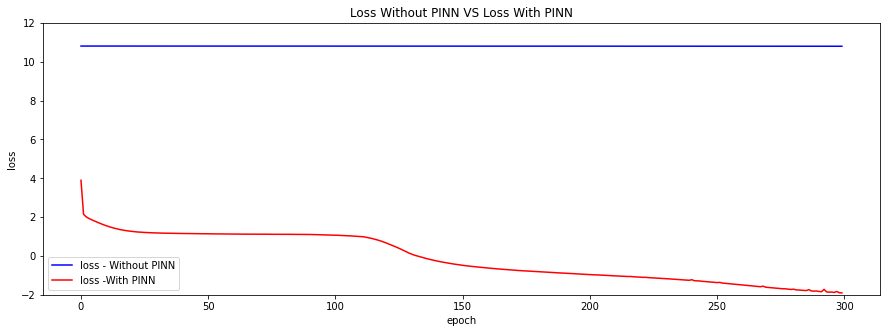

In [2]:
lossnn = np.load(rb'C:/Users/kq250f/Desktop/Swyam/Physics_informed_AM-main/Trained_Models/lossnn.npy')
lospinn = np.load(rb'C:/Users/kq250f/Desktop/Swyam/Physics_informed_AM-main/Trained_Models/losspinn.npy')
plt.figure(figsize=[15,5])
plt.title("Loss Without PINN VS Loss With PINN")
plt.xlabel("epoch")
plt.ylabel("loss")
x = np.arange(0,len(lossnn))
plt.plot(x,[math.log10(i) for i in lossnn],color='blue', label="loss - Without PINN")
plt.plot(x,[math.log10(i) for i in lospinn],color='red', label="loss -With PINN")
plt.legend(loc="best")
plt.ylim(-2, 12)
plt.show()

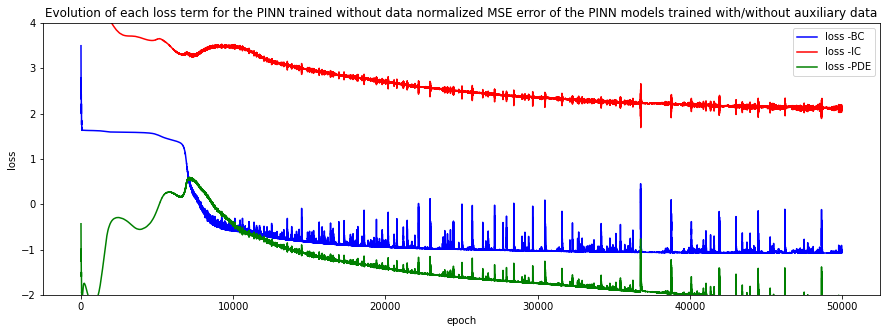

In [3]:
bareplate_array = np.load('C:/Users/kq250f/Desktop/Swyam/Physics_informed_AM-main/model/bareplate.npy')
plt.figure(figsize=[15,5])
x = np.arange(0,len(bareplate_array))
bc = bareplate_array[:,1]
ic = bareplate_array[:,2]
pde = bareplate_array[:,3]
plt.title("Evolution of each loss term for the PINN trained without data normalized MSE error of the PINN models trained with/without auxiliary data") 
plt.xlabel("epoch") 
plt.ylabel("loss") 
plt.plot(x,[math.log10(i) for i in bc],color='blue', label="loss -BC") 
plt.plot(x,[math.log10(i) for i in ic],color='red', label="loss -IC")
plt.plot(x,[math.log10(i) for i in pde],color='green', label="loss -PDE")
plt.legend(loc="upper right")
plt.ylim(math.log10(.01), math.log10(10000))
plt.show()